*Autorzy projektu:*

* Katarzyna Korsak
* Joanna Pawelczyk
* Łukasz Cupek

# Opis zagadnienia

  Rak nerki jest nowotworem stosunkowo rzadkim i stanowi 3-4% nowych rozpoznań wśród wszystkich nowotworów. Występuje on częściej u mężczyzn niż u kobiet. Rak jasnokomórkowy jest najczęstszym typem raka nerki i stanowi około 70-80% przypadków.

  W naszym projekcie, na podstawie próbek tkanek pobranych z nerek zdrowych i tkanek z nerek o różnym stopniu zmian nowotworowych, analizujemy zależność ekspresji poszczególnych genów w tkance od tego czy występują w niej zmiany nowotworowe. Bazując na wynikach tego projektu będzie można, na podstawie badania ekspresji genów, określić czy tkanka zawiera zmiany nowotworowe oraz stopień ich zaawansowania.

   Do naszego projektu skorzystaliśmy z danych opublikowanych w bazie GEO (https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE68417&fbclid=IwAR31u0J3vDxWE-QO39eKOonfbTgWvT5HeALXZx4LgDZlq3Nca9jcdwWzDQc), które zawierają 49 próbki pacjentów , w tym 14 tkanek zdrowych, 6 tkanek ze zmianami niezłośliwymi i 29 ze zmianami złośliwymi. Projekt i próbki dotyczą deregulacji ekspresji poszczególnych genów raka jasnokomórkowego nerki. 

  Ponadto na podstawie analizy ekspresji genów można docelowo wyróżnić markery nowotworowe i wyznaczyć szlaki metaboliczne, które wywołują proces nowotworzenia, co stanowi ciekawy temat do dalszego rozwoju tego projektu.




# Przygotowanie danych

Dane zostały pobrane z bazy importerem napisanym w języku R i wyeksportowane do pliku CSV.


Kod importera danych:
```
gse <- getGEO("GSE68417",GSEMatrix=FALSE)
probesets <- Table(GPLList(gse)[[1]])$ID
data.matrix <- do.call('cbind',lapply(GSMList(gse),function(x)
{tab <- Table(x)
mymatch <- match(probesets,tab$ID_REF)
return(tab$VALUE[mymatch])
}))
data.matrix <- apply(data.matrix,2,function(x) {as.numeric(as.character(x))})

raw_names <- Table(GPLList(gse)[[1]])$gene_assignment
id <- Table(GPLList(gse)[[1]])$ID
names <- sapply(strsplit(raw_names, split=' // ', fixed=TRUE), function(x) (x[2]))
for(i in 1:length(names)){
  if(is.na(names[i]))
    names[i]<-id[i]
}
rownames(data.matrix) <- names
colnames(data.matrix) <- names(GSMList(gse))

write.csv(data.matrix,'dane.csv')
```



Zamontowaliśmy dysk google drive, żeby móc zaimportować z niego plik "dane.csv". Krok ten można pominąć, jeśli notebook uruchamiany jest lokalnie, a plik znajduje się w tym samym katalogu.

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np

Z powodu możliwego wystąpienia problemów z kodowaniem, nazwy kolumn zostały wygenerowane. 

In [ ]:
zmiany_lagodne = ["zmiany_łagodne"]
for i in range(1, 6):
    zmiany_lagodne.append(zmiany_lagodne[0]+str(i))
niska_zlosliwosc = ["niska_złośliwość"]
for i in range(1, 13):
    niska_zlosliwosc.append(niska_zlosliwosc[0]+str(i))
wysoka_zlosliwosc = ["wysoka_złośliwość"]
for i in range(1, 16):
    wysoka_zlosliwosc.append(wysoka_zlosliwosc[0]+str(i))
tkanka_normalna = ["tkanka_normalna"]
for i in range(1, 14):
    tkanka_normalna.append(tkanka_normalna[0]+str(i))
kolumny = ["nazwa_genu"] + zmiany_lagodne + niska_zlosliwosc + wysoka_zlosliwosc + tkanka_normalna

In [ ]:
raw_df = pd.read_csv('dane.csv', engine='python')
raw_df.columns = kolumny
raw_df

,nazwa_genu,zmiany_łagodne,zmiany_łagodne1,zmiany_łagodne2,zmiany_łagodne3,zmiany_łagodne4,zmiany_łagodne5,niska_złośliwość,niska_złośliwość1,niska_złośliwość2,niska_złośliwość3,niska_złośliwość4,niska_złośliwość5,niska_złośliwość6,niska_złośliwość7,niska_złośliwość8,niska_złośliwość9,niska_złośliwość10,niska_złośliwość11,niska_złośliwość12,wysoka_złośliwość,wysoka_złośliwość1,wysoka_złośliwość2,wysoka_złośliwość3,wysoka_złośliwość4,wysoka_złośliwość5,wysoka_złośliwość6,wysoka_złośliwość7,wysoka_złośliwość8,wysoka_złośliwość9,wysoka_złośliwość10,wysoka_złośliwość11,wysoka_złośliwość12,wysoka_złośliwość13,wysoka_złośliwość14,wysoka_złośliwość15,tkanka_normalna,tkanka_normalna1,tkanka_normalna2,tkanka_normalna3,tkanka_normalna4,tkanka_normalna5,tkanka_normalna6,tkanka_normalna7,tkanka_normalna8,tkanka_normalna9,tkanka_normalna10,tkanka_normalna11,tkanka_normalna12,tkanka_normalna13
0,7896736,5.92712,6.52653,5.23731,5.06527,6.54263,5.00201,4.69753,5.37570,4.70766,4.32026,5.48752,4.65254,4.19534,5.48622,5.41820,5.48574,4.68576,5.73935,5.70286,5.41884,5.31038,5.07564,5.42983,5.45683,4.91238,5.06587,5.03760,4.96729,5.38466,4.65333,5.37368,5.72849,5.38275,4.56113,4.69480,5.33204,5.68648,5.65913,6.10535,5.37847,5.52476,4.99091,5.31184,6.14563,5.57232,5.00702,5.85969,5.56102,6.26852
1,OR4G2P,3.40584,4.07263,3.69355,3.27852,3.56018,3.21016,3.45535,3.28678,3.31588,3.58208,4.36556,3.32028,3.30756,3.32303,3.35765,3.39428,3.40847,3.44953,3.48054,3.24382,3.28654,3.40277,3.34962,3.73307,3.22155,3.16319,3.56740,3.41917,3.84289,3.46805,3.86178,3.40298,3.40993,3.51541,3.52365,3.35062,3.39404,3.34807,3.38370,3.31703,3.70256,3.46292,3.38097,3.27083,3.32683,3.44964,3.39970,3.31010,3.37712
2,OR4F4,3.35327,3.67622,3.71047,3.28267,3.43178,3.14061,3.42577,3.26361,3.48837,3.42898,4.42581,3.34790,3.31204,3.41230,3.39446,3.35718,3.49155,3.50874,3.35809,3.35946,3.46789,3.46767,3.44439,3.43151,3.22122,3.32371,3.42890,3.55405,3.91962,3.53417,3.77333,3.57469,3.58616,3.51591,3.38832,3.30622,3.41451,3.27790,3.07501,3.49824,3.56143,3.41902,3.48425,3.33554,3.34840,3.32938,3.38729,3.30091,3.39205
3,LOC728323,8.04791,7.28552,8.09590,8.11164,8.32664,7.32171,8.19147,7.42172,7.69070,7.67521,8.70430,7.94705,7.82738,8.38551,7.88293,8.45556,7.22402,7.87988,7.73851,8.09255,7.61503,8.17411,8.29555,8.48050,7.96891,8.07293,7.77731,8.10158,8.48593,7.35497,8.02491,9.80372,8.20860,8.05430,7.01878,7.39384,7.53139,7.72619,7.73484,8.05161,7.70525,7.94877,7.98528,7.44972,8.18579,8.32796,7.71925,7.76368,7.31134
4,OR4F29,3.89207,3.31250,4.50366,3.99900,3.96985,4.12610,4.29338,4.39911,4.65629,5.33844,7.20989,4.87072,3.52912,3.95544,4.74037,3.90640,4.96434,4.68235,4.52733,4.16159,4.38141,5.09285,4.72936,5.33875,5.43284,5.37672,4.28619,4.30778,4.25272,4.22984,5.94074,4.28781,4.47515,5.03281,5.18237,4.20803,4.69025,3.95990,4.16674,4.13314,3.88866,4.57922,4.62335,4.10091,4.12872,4.07469,4.41546,4.06428,3.84700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33292,7896726,3.62289,4.01282,3.49960,4.00638,3.73998,4.90896,5.48538,5.00577,4.01129,3.92169,6.67645,4.89082,5.71892,6.14234,6.54576,4.37567,5.31438,4.26622,4.27741,4.53876,4.27556,6.02807,5.63242,5.45009,5.79744,6.16127,6.96693,4.57238,6.65061,5.06499,3.60379,5.30952,4.80997,4.80948,4.61300,4.58984,4.09358,4.65345,3.52794,4.86213,3.63881,3.40860,4.61838,4.14879,3.79056,5.05027,3.66675,5.05072,3.59660
33293,7896727,7.20995,6.95463,7.83843,8.06422,7.87397,7.23511,8.69332,9.40576,8.93841,8.44760,9.21153,8.94682,9.88149,8.66071,8.64912,9.36935,8.39234,8.17498,8.15864,8.68166,8.56459,8.59279,9.07704,9.02496,7.72114,9.47425,8.76472,8.71646,7.64965,6.48554,6.52941,7.42556,7.70916,8.68672,7.46443,7.03732,7.36028,7.77016,7.00789,7.73278,7.09419,7.68935,7.41799,7.35454,6.66428,7.84556,7.24297,8.11438,6.74976
33294,7896728,5.18264,4.85858,4.65219,4.20322,4.84667,4.46567,7.47311,5.68850,4.632

Sprawdziliśmy czy występują jakieś brakujące wartości.

In [ ]:
raw_df.isnull().sum()

nazwa_genu             0
zmiany_łagodne         0
zmiany_łagodne1        0
zmiany_łagodne2        0
zmiany_łagodne3        0
zmiany_łagodne4        0
zmiany_łagodne5        0
niska_złośliwość       0
niska_złośliwość1      0
niska_złośliwość2      0
niska_złośliwość3      0
niska_złośliwość4      0
niska_złośliwość5      0
niska_złośliwość6      0
niska_złośliwość7      0
niska_złośliwość8      0
niska_złośliwość9      0
niska_złośliwość10     0
niska_złośliwość11     0
niska_złośliwość12     0
wysoka_złośliwość      0
wysoka_złośliwość1     0
wysoka_złośliwość2     0
wysoka_złośliwość3     0
wysoka_złośliwość4     0
wysoka_złośliwość5     0
wysoka_złośliwość6     0
wysoka_złośliwość7     0
wysoka_złośliwość8     0
wysoka_złośliwość9     0
wysoka_złośliwość10    0
wysoka_złośliwość11    0
wysoka_złośliwość12    0
wysoka_złośliwość13    0
wysoka_złośliwość14    0
wysoka_złośliwość15    0
tkanka_normalna        0
tkanka_normalna1       0
tkanka_normalna2       0
tkanka_normalna3       0


Pomimo pozornego braku Null'i, niektóre geny nie mają swojej nazwy - mają ID składające się z samych cyfr. Należy usunąć te wiersze za pomocą wyrażenia regularnego. 

In [ ]:
raw_df.drop(raw_df[raw_df.nazwa_genu.str.contains('^\d+$')].index, axis=0, inplace=True)
raw_df

,nazwa_genu,zmiany_łagodne,zmiany_łagodne1,zmiany_łagodne2,zmiany_łagodne3,zmiany_łagodne4,zmiany_łagodne5,niska_złośliwość,niska_złośliwość1,niska_złośliwość2,niska_złośliwość3,niska_złośliwość4,niska_złośliwość5,niska_złośliwość6,niska_złośliwość7,niska_złośliwość8,niska_złośliwość9,niska_złośliwość10,niska_złośliwość11,niska_złośliwość12,wysoka_złośliwość,wysoka_złośliwość1,wysoka_złośliwość2,wysoka_złośliwość3,wysoka_złośliwość4,wysoka_złośliwość5,wysoka_złośliwość6,wysoka_złośliwość7,wysoka_złośliwość8,wysoka_złośliwość9,wysoka_złośliwość10,wysoka_złośliwość11,wysoka_złośliwość12,wysoka_złośliwość13,wysoka_złośliwość14,wysoka_złośliwość15,tkanka_normalna,tkanka_normalna1,tkanka_normalna2,tkanka_normalna3,tkanka_normalna4,tkanka_normalna5,tkanka_normalna6,tkanka_normalna7,tkanka_normalna8,tkanka_normalna9,tkanka_normalna10,tkanka_normalna11,tkanka_normalna12,tkanka_normalna13
1,OR4G2P,3.40584,4.07263,3.69355,3.27852,3.56018,3.21016,3.45535,3.28678,3.31588,3.58208,4.36556,3.32028,3.30756,3.32303,3.35765,3.39428,3.40847,3.44953,3.48054,3.24382,3.28654,3.40277,3.34962,3.73307,3.22155,3.16319,3.56740,3.41917,3.84289,3.46805,3.86178,3.40298,3.40993,3.51541,3.52365,3.35062,3.39404,3.34807,3.38370,3.31703,3.70256,3.46292,3.38097,3.27083,3.32683,3.44964,3.39970,3.31010,3.37712
2,OR4F4,3.35327,3.67622,3.71047,3.28267,3.43178,3.14061,3.42577,3.26361,3.48837,3.42898,4.42581,3.34790,3.31204,3.41230,3.39446,3.35718,3.49155,3.50874,3.35809,3.35946,3.46789,3.46767,3.44439,3.43151,3.22122,3.32371,3.42890,3.55405,3.91962,3.53417,3.77333,3.57469,3.58616,3.51591,3.38832,3.30622,3.41451,3.27790,3.07501,3.49824,3.56143,3.41902,3.48425,3.33554,3.34840,3.32938,3.38729,3.30091,3.39205
3,LOC728323,8.04791,7.28552,8.09590,8.11164,8.32664,7.32171,8.19147,7.42172,7.69070,7.67521,8.70430,7.94705,7.82738,8.38551,7.88293,8.45556,7.22402,7.87988,7.73851,8.09255,7.61503,8.17411,8.29555,8.48050,7.96891,8.07293,7.77731,8.10158,8.48593,7.35497,8.02491,9.80372,8.20860,8.05430,7.01878,7.39384,7.53139,7.72619,7.73484,8.05161,7.70525,7.94877,7.98528,7.44972,8.18579,8.32796,7.71925,7.76368,7.31134
4,OR4F29,3.89207,3.31250,4.50366,3.99900,3.96985,4.12610,4.29338,4.39911,4.65629,5.33844,7.20989,4.87072,3.52912,3.95544,4.74037,3.90640,4.96434,4.68235,4.52733,4.16159,4.38141,5.09285,4.72936,5.33875,5.43284,5.37672,4.28619,4.30778,4.25272,4.22984,5.94074,4.28781,4.47515,5.03281,5.18237,4.20803,4.69025,3.95990,4.16674,4.13314,3.88866,4.57922,4.62335,4.10091,4.12872,4.07469,4.41546,4.06428,3.84700
5,MT-TM,9.53656,9.54513,9.49888,8.24317,10.14800,9.53647,8.05438,7.76670,7.87308,7.84665,9.16438,8.20277,7.98506,6.93804,7.31269,8.84755,7.90277,7.96961,7.47086,8.26902,7.08313,8.07524,8.09468,8.59983,8.29356,7.41796,8.79856,8.11858,8.92078,8.22401,8.71904,7.73322,8.06910,7.35524,7.99235,10.12870,10.21730,10.19840,9.44561,9.53760,9.55162,9.55328,9.96232,9.50880,9.31873,8.81629,9.65895,8.32317,10.34430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28864,RXRB,7.38473,6.60451,7.27003,6.78810,7.00113,7.07635,7.36425,7.02277,6.83312,6.80095,7.03747,6.80182,6.84059,6.75537,6.72978,6.77508,7.20293,7.39868,7.05170,7.08958,6.98048,7.27823,7.14364,7.25612,7.05712,6.97511,6.99372,6.73697,6.75630,7.25228,6.01152,5.99396,6.33719,7.43684,7.21192,7.02009,7.02932,7.03777,6.67039,6.90334,6.89283,7.15140,6.96073,6.81262,6.96245,7.04132,6.90177,7.01444,6.44573
28865,VPS52,8.81977,8.10399,8.34522,8.60338,8.47670,8.74794,7.81542,8.14984,8.26834,8.79976,7.92540,8.12110,7.83250,7.73314,7.70125,7.41839,8.25467,8.23505,8.19999,7.86840,8.23999,8.23605,7.66060,7.96077,8.36523,8.27401,8.40873,8.21143,7.61307,8.01961,6.68496,7.08083,7.29136,8.29523,7.95891,8.37798,8.19910,8.33993,8.21552,8.49186,8.09374,8.67873,8.47647,8.22867,8.31130,8.54973,8.21398,8.40964,7.93540
28866,RGL2,7.84385,6.86542,7.54654,8.06466,7.09424,7.81381,7.80574,7.57821,7.43280,7.

Następnie usunęliśmy geny, które zostały zmierzone więcej niż raz. Dla każdego takiego genu zachowano uśrednione wartości.

In [ ]:
df = raw_df.groupby('nazwa_genu').mean().reset_index()
df

,nazwa_genu,zmiany_łagodne,zmiany_łagodne1,zmiany_łagodne2,zmiany_łagodne3,zmiany_łagodne4,zmiany_łagodne5,niska_złośliwość,niska_złośliwość1,niska_złośliwość2,niska_złośliwość3,niska_złośliwość4,niska_złośliwość5,niska_złośliwość6,niska_złośliwość7,niska_złośliwość8,niska_złośliwość9,niska_złośliwość10,niska_złośliwość11,niska_złośliwość12,wysoka_złośliwość,wysoka_złośliwość1,wysoka_złośliwość2,wysoka_złośliwość3,wysoka_złośliwość4,wysoka_złośliwość5,wysoka_złośliwość6,wysoka_złośliwość7,wysoka_złośliwość8,wysoka_złośliwość9,wysoka_złośliwość10,wysoka_złośliwość11,wysoka_złośliwość12,wysoka_złośliwość13,wysoka_złośliwość14,wysoka_złośliwość15,tkanka_normalna,tkanka_normalna1,tkanka_normalna2,tkanka_normalna3,tkanka_normalna4,tkanka_normalna5,tkanka_normalna6,tkanka_normalna7,tkanka_normalna8,tkanka_normalna9,tkanka_normalna10,tkanka_normalna11,tkanka_normalna12,tkanka_normalna13
0,A1BG,3.75982,4.21187,3.76222,3.94810,4.13552,3.86834,4.10462,4.12192,3.94452,4.03649,4.05605,3.83109,4.25035,3.96551,4.01907,3.88943,4.01208,4.40428,3.93595,3.93365,3.83066,4.12512,4.00324,4.06704,3.96498,3.83114,3.81602,3.94566,3.99311,3.79039,4.23799,4.01716,4.00553,3.99653,3.97870,3.95967,3.94235,3.84487,3.84249,3.72724,3.90919,3.94507,3.78181,3.95339,3.88057,3.57350,3.70437,3.82931,4.07955
1,A1CF,3.84453,5.76476,4.21168,3.68172,4.62910,5.02145,7.73317,7.97894,9.02310,9.70292,7.19149,9.00792,4.05543,4.09189,7.65551,6.63374,9.04304,4.32528,8.18594,7.05469,7.36552,8.90461,4.29928,7.31641,9.37554,8.55040,8.35576,8.13323,6.01106,4.14038,7.22665,7.44612,6.54531,8.94974,7.73362,9.25271,9.00297,8.87233,9.18075,8.52492,8.74966,7.96267,9.18422,8.87849,9.33225,7.43006,9.45113,4.66735,8.81728
2,A2M,10.00710,9.18179,9.30802,11.53040,10.23720,11.60570,11.31540,11.77870,11.53260,10.74140,11.80120,11.30260,11.91540,11.53110,11.45480,11.74860,11.01150,10.49340,11.00900,11.71840,11.31260,11.66190,11.58190,11.43290,10.69800,11.54170,11.09940,11.72350,11.34570,8.80648,9.84317,10.47790,11.36480,10.97210,9.98340,11.32910,10.92680,11.22000,11.10440,11.68220,10.80100,11.05920,10.56600,11.19100,10.24120,11.73030,10.19300,12.08090,11.25530
3,A2ML1,3.45331,3.62922,3.81013,3.33260,3.82657,3.97763,3.45446,3.37886,3.47297,3.50900,3.60437,3.38291,3.45851,3.41286,3.42071,3.31680,3.53648,3.69395,3.55331,3.43723,3.45789,3.43164,3.40820,3.45527,3.65883,3.46209,3.30506,3.48579,3.46855,3.45892,3.41088,3.58385,3.50462,3.55301,3.60947,3.33939,3.34545,3.37207,3.56071,3.50135,3.66048,3.32189,3.39651,3.50921,3.58541,3.27959,3.44612,3.31460,3.65381
4,A3GALT2,3.61636,3.67506,3.54241,3.62178,3.61587,3.79325,3.68289,3.64788,3.66718,3.70117,3.42162,3.54460,3.72566,3.51121,3.48545,3.56768,3.83072,3.55341,3.71922,3.55908,3.67149,3.55385,3.71666,3.61853,3.71980,3.63825,3.49789,3.57818,3.64115,3.85585,3.56244,3.63307,3.70784,3.40932,3.50046,3.50510,3.76232,3.39692,3.63970,3.57444,3.38906,3.31203,3.36858,3.70280,3.82339,3.39462,3.70758,3.71422,3.49228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23302,ZYG11A,3.55308,3.93104,3.52460,3.92556,3.61196,3.46782,3.50887,4.07652,3.61590,3.61642,3.87086,3.68042,3.39100,3.52892,3.92908,3.34152,4.27530,3.64642,3.79536,4.33820,3.75368,3.50116,3.44655,4.17249,3.86037,3.79688,4.26245,3.71498,3.39999,3.60912,5.02028,4.06162,3.54887,3.51137,3.63412,5.51154,6.36189,4.98882,7.11811,4.44178,5.38313,4.08592,4.97036,5.01910,6.13550,3.84940,6.89932,3.45439,6.00811
23303,ZYG11B,8.88627,8.77625,9.33268,8.32452,8.52996,7.82101,7.76106,7.78752,8.25068,8.13818,7.47106,8.17720,8.32647,7.93338,7.85431,7.95031,7.78685,7.86008,7.83039,8.15887,7.56956,7.46301,7.87437,7.79225,7.83993,7.85252,7.94574,8.20337,8.18915,7.77685,7.92933,7.91221,7.93922,7.55846,7.22021,8.44490,8.45304,8.38184,8.31732,8.18619,8.11793,8.00219,8.33417,8.44333,8.46818,8.00439,8.74117,8.19970,8.21826
23304,ZYX,6.73174,6.86837,6.23233,7.87773,6.34557,7

# Podstawowa analiza danych

In [ ]:
import matplotlib.pyplot as plt

Na początku wygenerowaliśmy podstawowe statystyki opisowe.

In [ ]:
df.describe()

,zmiany_łagodne,zmiany_łagodne1,zmiany_łagodne2,zmiany_łagodne3,zmiany_łagodne4,zmiany_łagodne5,niska_złośliwość,niska_złośliwość1,niska_złośliwość2,niska_złośliwość3,niska_złośliwość4,niska_złośliwość5,niska_złośliwość6,niska_złośliwość7,niska_złośliwość8,niska_złośliwość9,niska_złośliwość10,niska_złośliwość11,niska_złośliwość12,wysoka_złośliwość,wysoka_złośliwość1,wysoka_złośliwość2,wysoka_złośliwość3,wysoka_złośliwość4,wysoka_złośliwość5,wysoka_złośliwość6,wysoka_złośliwość7,wysoka_złośliwość8,wysoka_złośliwość9,wysoka_złośliwość10,wysoka_złośliwość11,wysoka_złośliwość12,wysoka_złośliwość13,wysoka_złośliwość14,wysoka_złośliwość15,tkanka_normalna,tkanka_normalna1,tkanka_normalna2,tkanka_normalna3,tkanka_normalna4,tkanka_normalna5,tkanka_normalna6,tkanka_normalna7,tkanka_normalna8,tkanka_normalna9,tkanka_normalna10,tkanka_normalna11,tkanka_normalna12,tkanka_normalna13
count,23307.000000,23307.000000,23307.000000,23307.000000,23307.000000,23307.000000,23307.000000,23307.000000,23307.000000,23307.000000,23307.000000,23307.000000,23307.000000,23307.000000,23307.000000,23307.000000,23307.000000,23307.000000,23307.000000,23307.000000,23307.000000,23307.000000,23307.000000,23307.000000,23307.000000,23307.000000,23307.000000,23307.000000,23307.000000,23307.000000,23307.000000,23307.000000,23307.000000,23307.000000,23307.000000,23307.000000,23307.000000,23307.000000,23307.000000,23307.000000,23307.000000,23307.000000,23307.000000,23307.000000,23307.000000,23307.000000,23307.000000,23307.000000,23307.000000
mean,5.537118,5.536548,5.534147,5.529942,5.508630,5.532992,5.516176,5.508192,5.521049,5.524633,5.481695,5.521449,5.500140,5.509391,5.514408,5.505439,5.511156,5.501435,5.497234,5.510542,5.506173,5.505789,5.496728,5.498479,5.506159,5.508330,5.521063,5.517862,5.517985,5.503820,5.491527,5.506977,5.510671,5.508633,5.493025,5.538422,5.534035,5.543602,5.523933,5.544600,5.546933,5.544281,5.536124,5.531178,5.542648,5.542032,5.525285,5.545034,5.528653
std,2.073659,1.979937,1.993568,2.032040,1.970306,2.017893,2.003463,2.010203,2.016982,2.006238,1.883017,2.025266,1.967335,1.997614,1.982286,1.968108,2.006267,1.897138,1.937665,1.999061,1.992631,2.007604,1.997012,1.997460,2.002480,2.012495,1.987866,1.983366,1.973701,2.003027,1.902354,1.920842,1.943803,1.943018,1.923598,2.036392,2.007792,2.029888,2.022872,1.968832,1.925070,2.007494,2.016843,1.972889,1.984977,2.024312,2.024374,2.038416,1.948937
min,2.621020,2.482430,2.585640,2.578210,2.611270,2.559100,2.609250,2.551430,2.624070,2.522440,2.632480,2.567960,2.634250,2.678230,2.663820,2.698150,2.640610,2.486160,2.590010,2.637180,2.593790,2.541950,2.619180,2.470220,2.572690,2.616880,2.638300,2.583650,2.656420,2.594990,2.620150,2.676500,2.699050,2.662910,2.722290,2.554390,2.695270,2.617820,2.563750,2.615000,2.721930,2.553770,2.567540,2.509670,2.699650,2.613530,2.613550,2.604900,2.714710
25%,3.706625,3.843260,3.831940,3.697425,3.811732,3.716430,3.729335,3.706480,3.719345,3.733470,3.850770,3.707495,3.763670,3.744440,3.761423,3.762740,3.717135,3.859155,3.800260,3.733170,3.725415,3.696460,3.739150,3.711600,3.730490,3.701495,3.740335,3.760722,3.770520,3.747715,3.865695,3.838710,3.834518,3.803350,3.814606,3.718035,3.750770,3.723235,3.737405,3.796030,3.876910,3.727100,3.739710,3.801825,3.800195,3.694145,3.734275,3.687875,3.846355
50%,4.986340,4.987320,4.941290,5.104110,4.961370,5.142530,5.076120,5.070350,5.041140,5.057470,5.044450,5.066710,5.060280,5.019030,5.066660,5.062450,5.077630,5.068790,5.056520,5.060270,5.090720,5.101890,4.992190,5.067200,5.048100,5.087220,5.085140,5.066630,5.092730,5.014920,5.007800,5.039040,5.009530,5.063850,5.060490,5.115330,5.085260,5.130470,5.062590,5.133360,5.101880,5.161880,5.098710,5.090340,5.084660,5.186660,5.055480,5.153680,5.060660
75%,7.100050,6.968142,6.991883,7.070685,6.922445,7.043300,7.013725,7.019530,7.048035,7.051440,6.823000,7.050750,6.943340,7.002830,6.981950,6.944845,7.011325,6.832335,6.904980,7.006920,6.987425,7.017703,6.986125,6.991520,6.970950,7.032625,7.015370,7.

Sprawdziliśmy odchylenie standardowe ekspresji genów pomiędzy próbkami tkanek tego samego typu, żeby pokazać, że nie różni się ona znacząco wśród tkanek tej samej kategorii, a zatem operując nawet na małej liczbie próbek można wyciągnąć wiarygodne wnioski.

In [ ]:
df[tkanka_normalna].std(axis=1).sort_values().describe()

count    23307.000000
mean         0.262929
std          0.223648
min          0.032232
25%          0.138890
50%          0.193271
75%          0.292260
max          2.379069
dtype: float64

In [ ]:
df[zmiany_lagodne].std(axis=1).sort_values().describe()

count    23307.000000
mean         0.381534
std          0.353907
min          0.018972
25%          0.167818
50%          0.269419
75%          0.456879
max          4.483674
dtype: float64

In [ ]:
df[niska_zlosliwosc].std(axis=1).sort_values().describe()

count    23307.000000
mean         0.344776
std          0.283794
min          0.037276
25%          0.162142
50%          0.261630
75%          0.415852
max          3.094030
dtype: float64

In [ ]:
df[wysoka_zlosliwosc].std(axis=1).sort_values().describe()

count    23307.000000
mean         0.373597
std          0.302469
min          0.046588
25%          0.175060
50%          0.287587
75%          0.453925
max          3.469662
dtype: float64

Przeprowadziliśmy analizę PCA, żeby odrzucić próbki, których ekspresja nie jest w korelacji z poziomem zmian nowotworowych tkanki. Stosowana metoda ma na celu wyrażenie wielowymiarowych obserwacji przy użyciu małej liczby współrzędnych, zachowując maksimum oryginalnej wariancji. 
Aby poprawić skuteczność PCA, wykonaliśmy standaryzację danych.

In [ ]:
from sklearn.preprocessing import StandardScaler
features = kolumny[1:] 
x = df.loc[:, features].values
y = df.loc[:,['nazwa_genu']].values
x = StandardScaler().fit_transform(x)

In [ ]:
kategorie = []
for i in range(1, 7):
    kategorie.append("zmiany_łagodne")    
for i in range(1, 14):
    kategorie.append("niska_złośliwość")    
for i in range(1, 17):
    kategorie.append("wysoka_złośliwość")
for i in range(1, 15):
    kategorie.append("tkanka_normalna")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


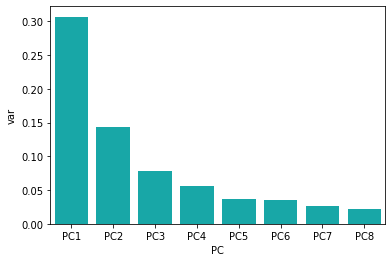

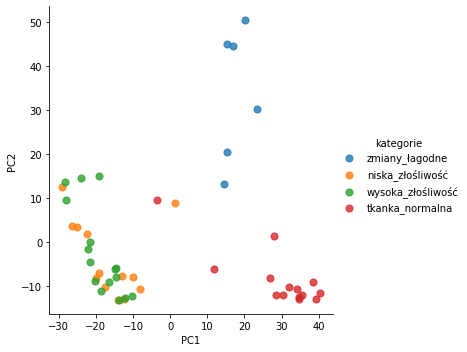

In [ ]:
from sklearn import decomposition
import seaborn as sns

pca = decomposition.PCA(n_components=8)
fit = pca.fit_transform(np.transpose(x))
pca_df = pd.DataFrame(data = fit, 
        columns = ['PC1', 'PC2','PC3','PC4','PC5', 'PC6','PC7','PC8'])
pca_df['kategorie'] = kategorie
nr_kolumn=range(49)
pca_df['kolumny'] = kolumny[1:]
pca_df['numery_kolumn'] = nr_kolumn
pca_rates = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC1','PC2','PC3','PC4','PC5', 'PC6','PC7','PC8']})
sns.barplot(x='PC',y="var", 
           data=pca_rates, color="c");
sns.lmplot( x="PC1", y="PC2",
  data=pca_df, 
  fit_reg=False, 
  hue='kategorie',
  legend=True,
  scatter_kws={"s": 50})

Do metody PCA wykorzystuje się najczęściej pierwsze dwie składowe, a 
resztę traktuje się jako pomijalny szum. Rozkład składowych widać na
powyższym wykresie słupkowym. 

lmplot() nie posiada funkcji opisu punktów, dlatego zostały one zaznaczone
na poniższym wykresie

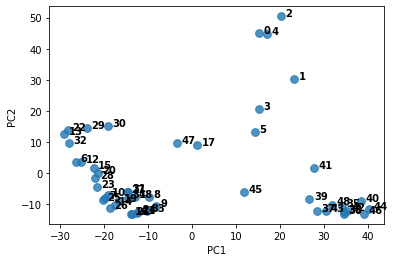

In [ ]:
p1=sns.regplot(data=pca_df, x="PC1", y="PC2", fit_reg=False, scatter_kws={'s':60})

for line in range(0,pca_df.shape[0]):
     p1.text(pca_df.PC1[line]+1, pca_df.PC2[line], pca_df.numery_kolumn[line], horizontalalignment='left', size='medium', color='black', weight='semibold')


Na wykresie punktowym PCA można zobaczyć, że obserwacje 47 i 17 nie znajdują się w grupach utworzonych przez pozostałe punkty. Oznacza to, że nie zachodzi zależność pomiędzy grupą do której należą, a dwiema głównymi składowymi.

In [ ]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,kategorie,kolumny,numery_kolumn
0,15.239609,45.113400,-13.042993,-5.564781,-9.486009,-2.461438,0.811932,-1.762274,zmiany_łagodne,zmiany_łagodne,0
1,23.318708,30.299683,-14.812325,5.818020,-3.104842,2.857343,-3.403263,-1.554768,zmiany_łagodne,zmiany_łagodne1,1
2,20.215098,50.415904,-22.415384,1.405815,-7.606439,0.997062,0.799648,3.410806,zmiany_łagodne,zmiany_łagodne2,2
3,15.350684,20.523954,16.872595,-20.508119,11.588571,9.963707,3.859740,-2.742788,zmiany_łagodne,zmiany_łagodne3,3
4,17.050766,44.698521,-17.460733,-3.852182,-7.800646,-2.852454,-0.003941,-0.814621,zmiany_łagodne,zmiany_łagodne4,4
5,14.409519,13.161153,20.965102,-19.522785,8.994549,9.948292,4.886215,-2.943722,zmiany_łagodne,zmiany_łagodne5,5
6,-26.476473,3.746599,5.376326,1.713102,0.600611,0.718342,-9.914276,-3.052140,niska_złośliwość,niska_złośliwość,6
7,-19.835879,-8.030974,-6.609940,-7.495463,1.692699,-3.727844,-2.565210,5.781991,niska_złośliwość,niska_złośliwość1,7
8,-9.873376,-7.766201,-12.552558,-9.940095,10.170697,-4.526034,0.146978,8.623130,niska_złośliwość,niska_złośliwość2,8
9,-8.141103,-10.494353,-16.498873,-5.927670,8.304707,-2.950501,2.244060,8.314684,niska_złośliwość,niska_złośliwość3,9


Na podstawie dopasowania PCA usuwamy ze zbioru próbki 17 i 47:

In [ ]:
df_after_pca=df
df_after_pca=df_after_pca.drop(['niska_złośliwość11','tkanka_normalna12'],axis=1)
df_after_pca.head()

,nazwa_genu,zmiany_łagodne,zmiany_łagodne1,zmiany_łagodne2,zmiany_łagodne3,zmiany_łagodne4,zmiany_łagodne5,niska_złośliwość,niska_złośliwość1,niska_złośliwość2,niska_złośliwość3,niska_złośliwość4,niska_złośliwość5,niska_złośliwość6,niska_złośliwość7,niska_złośliwość8,niska_złośliwość9,niska_złośliwość10,niska_złośliwość12,wysoka_złośliwość,wysoka_złośliwość1,wysoka_złośliwość2,wysoka_złośliwość3,wysoka_złośliwość4,wysoka_złośliwość5,wysoka_złośliwość6,wysoka_złośliwość7,wysoka_złośliwość8,wysoka_złośliwość9,wysoka_złośliwość10,wysoka_złośliwość11,wysoka_złośliwość12,wysoka_złośliwość13,wysoka_złośliwość14,wysoka_złośliwość15,tkanka_normalna,tkanka_normalna1,tkanka_normalna2,tkanka_normalna3,tkanka_normalna4,tkanka_normalna5,tkanka_normalna6,tkanka_normalna7,tkanka_normalna8,tkanka_normalna9,tkanka_normalna10,tkanka_normalna11,tkanka_normalna13
0,A1BG,3.75982,4.21187,3.76222,3.94810,4.13552,3.86834,4.10462,4.12192,3.94452,4.03649,4.05605,3.83109,4.25035,3.96551,4.01907,3.88943,4.01208,3.93595,3.93365,3.83066,4.12512,4.00324,4.06704,3.96498,3.83114,3.81602,3.94566,3.99311,3.79039,4.23799,4.01716,4.00553,3.99653,3.97870,3.95967,3.94235,3.84487,3.84249,3.72724,3.90919,3.94507,3.78181,3.95339,3.88057,3.57350,3.70437,4.07955
1,A1CF,3.84453,5.76476,4.21168,3.68172,4.62910,5.02145,7.73317,7.97894,9.02310,9.70292,7.19149,9.00792,4.05543,4.09189,7.65551,6.63374,9.04304,8.18594,7.05469,7.36552,8.90461,4.29928,7.31641,9.37554,8.55040,8.35576,8.13323,6.01106,4.14038,7.22665,7.44612,6.54531,8.94974,7.73362,9.25271,9.00297,8.87233,9.18075,8.52492,8.74966,7.96267,9.18422,8.87849,9.33225,7.43006,9.45113,8.81728
2,A2M,10.00710,9.18179,9.30802,11.53040,10.23720,11.60570,11.31540,11.77870,11.53260,10.74140,11.80120,11.30260,11.91540,11.53110,11.45480,11.74860,11.01150,11.00900,11.71840,11.31260,11.66190,11.58190,11.43290,10.69800,11.54170,11.09940,11.72350,11.34570,8.80648,9.84317,10.47790,11.36480,10.97210,9.98340,11.32910,10.92680,11.22000,11.10440,11.68220,10.80100,11.05920,10.56600,11.19100,10.24120,11.73030,10.19300,11.25530
3,A2ML1,3.45331,3.62922,3.81013,3.33260,3.82657,3.97763,3.45446,3.37886,3.47297,3.50900,3.60437,3.38291,3.45851,3.41286,3.42071,3.31680,3.53648,3.55331,3.43723,3.45789,3.43164,3.40820,3.45527,3.65883,3.46209,3.30506,3.48579,3.46855,3.45892,3.41088,3.58385,3.50462,3.55301,3.60947,3.33939,3.34545,3.37207,3.56071,3.50135,3.66048,3.32189,3.39651,3.50921,3.58541,3.27959,3.44612,3.65381
4,A3GALT2,3.61636,3.67506,3.54241,3.62178,3.61587,3.79325,3.68289,3.64788,3.66718,3.70117,3.42162,3.54460,3.72566,3.51121,3.48545,3.56768,3.83072,3.71922,3.55908,3.67149,3.55385,3.71666,3.61853,3.71980,3.63825,3.49789,3.57818,3.64115,3.85585,3.56244,3.63307,3.70784,3.40932,3.50046,3.50510,3.76232,3.39692,3.63970,3.57444,3.38906,3.31203,3.36858,3.70280,3.82339,3.39462,3.70758,3.49228


Następnie chcemy wyliczyć p-value (prawdopodobieństwo testowe) dla każdego genu, co pozwoli nam odrzucić te geny, których ekspresja nie ma związku ze zmianami nowotworowymi w tkance. Zgodnie z tym co przeczytaliśmy w publikacjach dotyczących ekspresji genów ([źródło](https://www.bioconductor.org/help/course-materials/2006/biocintro_oct/lectures/DifferentialGenes.pdf?fbclid=IwAR1JxLwUTWsREfIacT8m6Hfj5rYq2KVkX16uQtExuvBJYr73nfEHEq_LVRo), [źródło 2](http://barc.wi.mit.edu/education/hot_topics/diff_exp/Hot_Topics_-_Differential_Expression_2008_color.pdf?fbclid=IwAR3Z0gdBPTJMlie0zrLc7Bul5XFMAlGd4bczL9JuibsDUaRMDoH5RAZIZqU)), aby prawidłowo to zrobić powinniśmy zamiast zwykłego T-testu przeprowadzić "Moderated t- statistic", niestety nie znaleźliśmy gotowej implementacji tej operacji w Pythonie, dlatego zrobiliśmy to w R korzystając z pakietu limma.

Zapisujemy dane do pliku w celu analizy w R

In [ ]:
df_after_pca.to_csv('df_after_pca.csv')

Kod R:


```
dane<-read.csv("C:/Users/kkorsak/Documents/ue/sad/projekt/df_after_pca.csv")
groups<- "00000011111111111122222222222222223333333333333"
ref_group<- c()
for (i in 1:nchar(groups)) { 
  ref_group[i] <- substr(groups,i,i) }
ref_group<- paste("G", ref_group, sep="")    
fl <- as.factor(ref_group)
#dane<-t(dane)
dane<-data.frame(dane)
rownames(dane)<-dane[,2]
dane<-dane[,-1]
dane<-dane[,-1]
colnames(dane)<-fl
design <- model.matrix(~ colnames(dane) + 0, dane)
colnames(design) <- levels(fl)
fit <- lmFit(dane, design)
cont.matrix <- makeContrasts(G3-G0, G1-G0, G2-G1, G3-G2, levels=design) 
fit2 <- contrasts.fit(fit, cont.matrix)
fit2 <- eBayes(fit2, 0.01)
tT <- topTable(fit2, adjust="fdr", sort.by="B", number=Inf)
p <- 0.001
lessThanp<-which(tT$P.Value<p)
tT2<-tT[lessThanp,]
genes_selected<-rownames(tT2)
writeLines(genes_selected,"geny.txt")
```



W R przeprowadziliśmy test t by wyznaczyć p-value dla każdego genu. Hipoteza zerowa zakłada, że geny nie uległy zróżnicowanej ekspresji. Za wartość progową przyjęliśmy wartości mniejsze od 0,1%.
Im mniejsza wartość p–value, tym mniej prawdopodobne, że obserwowane dane pojawiły się przypadkowo i wyniki można uznać za 
potencjalnie prawidłowe. Ilość genów zmniejszyła się do 7563

In [ ]:
plik=open("geny.txt")
wyselekcjonowane_geny=plik.read().split('\n')
len(wyselekcjonowane_geny)

7563

Z danych usuwamy geny, które nie znajduą się w pliku geny.txt

---



In [ ]:
for n in range(0,len(df_after_pca)):
    if df_after_pca['nazwa_genu'][n] not in wyselekcjonowane_geny:
          df_after_pca = df_after_pca.drop(df_after_pca[df_after_pca.nazwa_genu == df_after_pca['nazwa_genu'][n]].index)

# Klastrowanie hierarchiczne

Klastrowanie pozwoli nam połączyć geny i próbki w grupy o wspólnym profilu ekspresji. Dzięki metodzie klastrowania hierarchicznego stworzymy drzewa, którego korzeń to klaster obejmujący wszystkie geny, a liście to pojedyncze geny. Gałęzie z kolei tworzą elementy wykazujące największe podobieństwo. 

Na początku uśredniamy wartości ekspresji genów przypisanych do poszczególnych kategorii.

In [ ]:
df_mean=df_after_pca
lagodne = df_mean.loc[: , "zmiany_łagodne":"zmiany_łagodne5"]
lagodne=lagodne.mean(axis=1)
niska=df_mean.loc[: , "niska_złośliwość":"niska_złośliwość12"]
niska=niska.mean(axis=1)
wysoka=df_mean.loc[: , "wysoka_złośliwość":"wysoka_złośliwość15"]
wysoka=wysoka.mean(axis=1)
normalna=df_mean.loc[: , "tkanka_normalna":"tkanka_normalna13"]
normalna=normalna.mean(axis=1)

In [ ]:
df_mean['zmiany_łagodne']=lagodne
df_mean['niska_złośliwość']=niska
df_mean['wysoka_złośliwość']=wysoka
df_mean['tkanka_normalna']=normalna
df_mean=df_mean[['nazwa_genu','zmiany_łagodne','niska_złośliwość',
                'wysoka_złośliwość','tkanka_normalna']]
df_mean

,nazwa_genu,zmiany_łagodne,niska_złośliwość,wysoka_złośliwość,tkanka_normalna
0,A1BG,3.947645,4.013923,3.971057,3.857236
1,A1CF,4.525540,7.525258,7.338020,8.818418
2,A2M,10.311702,11.428525,10.972741,11.023038
3,A2ML1,3.671577,3.458437,3.480706,3.459384
4,A3GALT2,3.644122,3.625440,3.616491,3.543755
...,...,...,...,...,...
23302,ZYG11A,3.669010,3.719181,3.852008,5.444075
23303,ZYG11B,8.611782,7.938951,7.826566,8.316378
23304,ZYX,7.007285,8.206688,8.215447,7.385337
23305,ZZEF1,7.092617,7.116770,7.107779,6.921008


Następnie od wartości średnich dla próbek zmienionych chorobowo odejmujemy wartości średnie tkanki zdrowej. Jest to wartość log ratio $(LR)$. 
*   Jeżeli $LR \in (-1, 1)$, to przyjmuje się brak efektu,
*   Jeżeli $LR >1$, to gen ulega nadekspresji,
*   Jeżeli $LR<-1$ następuje hamowanie ekspresji.

In [ ]:
lagodne_odjac_zwykle=df_mean['zmiany_łagodne']-df_mean['tkanka_normalna']
niskie_odjac_zwykle=df_mean['niska_złośliwość']-df_mean['tkanka_normalna']
wysokie_odjac_zwykle=df_mean['wysoka_złośliwość']-df_mean['tkanka_normalna']

In [ ]:
df_mean.loc['zmiany_łagodne']=lagodne_odjac_zwykle
df_mean.loc['niska_złośliwość']=niskie_odjac_zwykle
df_mean.loc['wysoka_złośliwość']=wysokie_odjac_zwykle

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [ ]:
df_mean

,nazwa_genu,zmiany_łagodne,niska_złośliwość,wysoka_złośliwość,tkanka_normalna
1,A1CF,-4.292878,-1.293161,-1.480398,8.818418
7,AAAS,0.545710,-0.387302,-0.184689,7.165663
8,AACS,0.738536,-0.366887,-0.286725,6.141098
13,AADAT,0.621616,-0.623814,-0.610536,6.720127
14,AAED1,0.195110,0.820676,0.636764,7.147275
...,...,...,...,...,...
23290,ZSWIM3,0.923701,-0.069311,-0.044470,4.137261
23302,ZYG11A,-1.775065,-1.724895,-1.592067,5.444075
23303,ZYG11B,0.295404,-0.377427,-0.489812,8.316378
23304,ZYX,-0.378052,0.821351,0.830111,7.385337


Współczynnik fold change oznacza bezwzględną wartość zmiany ekspresji genu względem kontroli i wyraża się wzorem $𝐹𝐶_{𝑖} = 2^{𝐿𝑅_{𝑖}}$.
*   Jeżeli $𝐹𝐶_{𝑖} = 5$, to ekspresja tego genu zmienionego chorobowo jest 5 razy większa niż w grupie kontrolnej,
*   Jeżeli $𝐹𝐶_{𝑖} = 0.5$, to oznacza to 2-krotny spadek ekspresji.


In [ ]:
df_logratio=df_mean[['zmiany_łagodne','niska_złośliwość',
                'wysoka_złośliwość']]
df_foldchange=pow(2,df_logratio) #z tego liczymy odleglosc i klastrujemy

In [ ]:
df_foldchange

,zmiany_łagodne,niska_złośliwość,wysoka_złośliwość
1,0.051017,0.408056,0.358390
7,1.459739,0.764558,0.879839
8,1.668481,0.775454,0.819761
13,1.538598,0.648953,0.654953
14,1.144812,1.766234,1.554837
...,...,...,...
23290,1.896975,0.953093,0.969646
23302,0.292181,0.302521,0.331696
23303,1.227229,0.769809,0.712118
23304,0.769476,1.767060,1.777822


Poniżej wygenerowaliśmy heatmapę, która przedstawia gęstość rozkładu poziomu ekspresji genów. Po lewej stronie w pionie widzimy dendogram odpowiadający genom, zaś w poziomie u góry wykresu widzimy dendogram próbek dopasowanych według oceny histopatologicznej.

/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


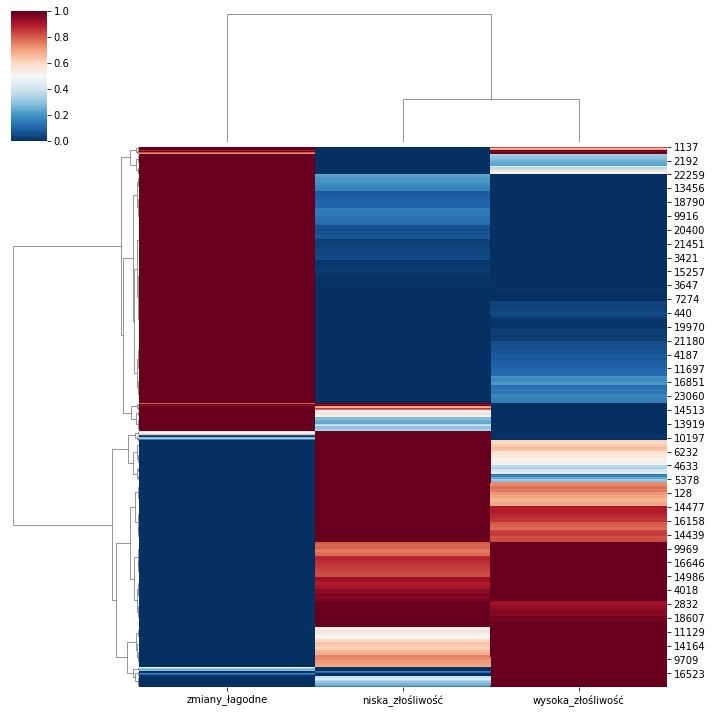

In [ ]:
heatmap=sns.clustermap(df_foldchange, metric="euclidean", standard_scale=5, method="ward", cmap="RdBu_r")

Hierarchiczne metody aglomeracyjne prowadzą do stworzenia
tzw. hierarchii drzewkowej elementów analizowanego zbioru
(dendrogramu). Na wstępie procedury przyjmuje się, że każdy obiekt stanowi osobne skupienie, następnie krokowo łączy się w podzbiory
podgrupy najbardziej do siebie podobne, aż do otrzymania
jednego skupienia zawierającego wszystkie obserwacje. W ten
sposób otrzymuje się wynikową segmentację, będącą
uporządkowanym zestawieniem podziałów na segmenty. Hierarchiczne metody grupowania nie wymagają wcześniejszego
podania liczby skupień (na dendrogramach wyboru liczby
skupień można dokonać na końcu analizy, przecinając go na
odpowiedniej wysokości), ale wymagają dużej mocy
obliczeniowej.


Diagram poniżej jest dendogramem wygenerowanym z macierzy połączeń metodą Ward'a. Liczbę skupień określiliśmy jako 13.

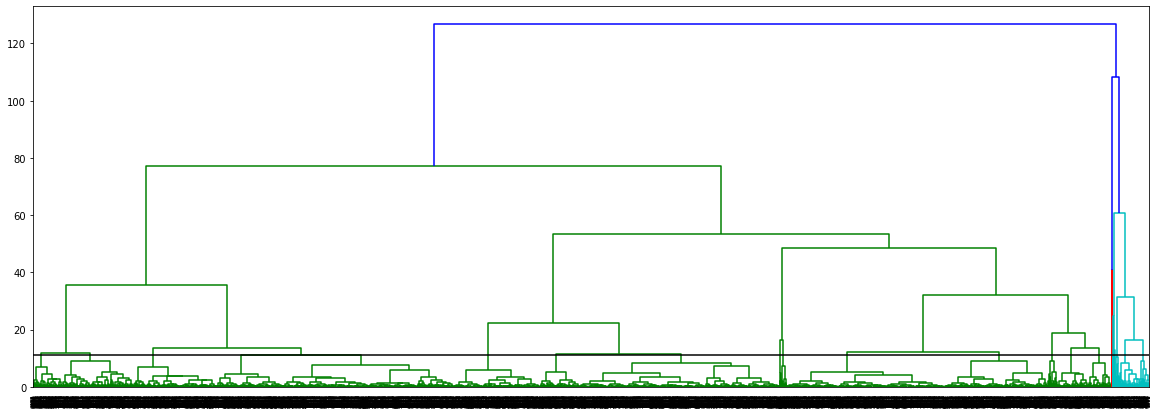

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

linkage_matrix = linkage(df_foldchange, 'ward')
plt.figure(figsize=(20,7))
dendrogram(linkage_matrix)
plt.axhline(13,color='black')

# Wnioski

Na wykresie heatmapy widać, że kolumny zostały odpowiednio sklastrowane względem przypisanej złośliwości. Skalę przyjęliśmy w zakresie 
od 0 do 5 by pokazać widoczne wygenerowane klastry. Maksymalna nadekspresja genu wynosi ~50. Dla zmian łagodnych można wyróżnić wyraźny
podział na dwa klastry, dla zmian o niskiej złośliwości około pięciu, a dla wysokiej złośliwości siedem. Dla metody 'warda' obligatoryjnym
jest przyjęcie mierzenia odległości metodą euklidesową, która wyraża się wzorem: 

d(p,q)=sqrt((p1-q1)^2+(p2-q2)^2+...+(pn-qn)^2)
dla n wymiarowej przestrzeni.

 Wyniki można wykorzystać do dalszej analizy w celu wyłonienia nowych markerów nowotworowych, a wygenerowane klastry mogą służyć do wyszukania w 
bazie KEGG pathway szlaków metabolicznych, które mogą prowadzić do nowotworzenia.